=========================================================================================================================
# <span><center style="text-decoration:underline">BIKE SHARING DATA ANALYSIS</center></span>

### AUTHOR : OUEDRAOGO Salam  
### CREATED : 15/07/2023  
### LAST MODIFIED : 24/07/2023

=========================================================================================================================


## <span><center style="text-decoration:underline">INTRODUCTION</center></span>
This notebook is about analysing data from bike sharing services and how to identify usage patterns depending on times features and weather conditions. For more detais, It about visual analysis, hypothesis testing, and time series analysis.  

Understanding the driving factors of bike sharing requests is essential for both compagnies and users.
From compagnies perspective, identifying the expected bike demand in a specific area, within a specific time frame : 
1. can significantly increase the compagnie's revenue and customer satisfaction,
2. allow the optimization to futher reduce operational costs 

The bike sharing data is from Capital Bikeshare in Washington, D.C., USA, for the period between January 1, 2011, and December 31,2012. The original dataset is available at https://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset#.

## <span><center style="text-decoration:underline">DATA EXPLORATION</center></span>

### <span><center style="text-decoration:underline">INDERSTANDING DATA</center></span>

In [1]:
# Imports of necessaries librairies

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# Bike sharing data loading
try:
    hourly_data = pd.read_csv('bike_sharing_service.csv')
except FileNotFoundError:
    data_link = 'https://raw.githubusercontent.com/PacktWorkshops/'\
                'The-Data-Analysis-Workshop/master/Chapter01/data/hour.csv'

    hourly_data = pd.read_csv(data_link)
    hourly_data.to_csv('bike_sharing_service.csv',index=False, sep=",")

In [3]:
# Printing the data's dimensions
print(hourly_data.shape)

(17379, 17)


In [4]:
# Getting the numbers of missing values
hourly_data.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [5]:
# Pritting the informations about the datasets, 
# Number of column, Non-Null values and Dtypes
hourly_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [6]:
# Getting some statistic on numerical data 
# Mean, standard deviation, minimum and maximum values, percentiles

hourly_data.describe().T

,count,mean,std,min,25%,50%,75%,max
instant,17379.0,8690.000000,5017.029500,1.00,4345.5000,8690.0000,13034.5000,17379.0000
season,17379.0,2.501640,1.106918,1.00,2.0000,3.0000,3.0000,4.0000
yr,17379.0,0.502561,0.500008,0.00,0.0000,1.0000,1.0000,1.0000
mnth,17379.0,6.537775,3.438776,1.00,4.0000,7.0000,10.0000,12.0000
hr,17379.0,11.546752,6.914405,0.00,6.0000,12.0000,18.0000,23.0000
holiday,17379.0,0.028770,0.167165,0.00,0.0000,0.0000,0.0000,1.0000
weekday,17379.0,3.003683,2.005771,0.00,1.0000,3.0000,5.0000,6.0000
workingday,17379.0,0.682721,0.465431,0.00,0.0000,1.0000,1.0000,1.0000
weathersit,17379.0,1.425283,0.639357,1.00,1.0000,1.0000,2.0000,4.0000
temp,17379.0,0.496987,0.192556,0.02,0.3400,0.5000,0.6600,1.0000


According to the description, we can split the columns into three main groups:
1. temporal features : This group contain all the informations about the time at witch the record was registered. there : dteday, season,yr, mnth, hr, holiday, weekday, and workingday.
2. weather related features: This one contains all informations about weather condition: The columns are : weathersit, temp, atemp, hum, windspeed.
3. record related features: The contains the information about the number of records for a specific moment(hour and date). This group contains : registered, casual and cnt.

### <span><center style="text-decoration:underline">DATA PREPROCESSING</center></span>

In [7]:
# Create a new copy of hourly data
cleaned_data = hourly_data.copy()

In [8]:
# Transform seasons columns
season_mappings = {1: 'winter', 2: 'spring', 3: 'summer', 4: 'fall'}
cleaned_data['season'] = cleaned_data['season'].apply(lambda x : season_mappings[x])

In [9]:
# Transform Yr column
yr_mapping = {0:2011, 1:2012}
cleaned_data['yr'] = cleaned_data['yr'].apply(lambda x : yr_mapping[x])

In [10]:
# Transform the Weekday

weekday_mapping = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday',\
                  3: 'Thursday', 4: 'Friday', 5: 'Saturday',\
                   6: 'Sunday'}

cleaned_data['weekday'] =cleaned_data['weekday'].apply(lambda x : weekday_mapping[x])

In [11]:
# Transform weathersit

weathersit_mapping = {1: 'clear', 2: 'cloudy',\
                      3: 'light_rain_snow', 4: 'heavy_rain_snow'}
cleaned_data['weathersit'] = cleaned_data['weathersit'].apply(lambda x : weathersit_mapping[x])

In [12]:
cleaned_data['hum'] = cleaned_data['hum']*100
cleaned_data['windspeed'] = cleaned_data['windspeed']*67

In [13]:
cleaned_data

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,winter,2011,1,0,0,Sunday,0,clear,0.24,0.2879,81.0,0.0000,3,13,16
1,2,2011-01-01,winter,2011,1,1,0,Sunday,0,clear,0.22,0.2727,80.0,0.0000,8,32,40
2,3,2011-01-01,winter,2011,1,2,0,Sunday,0,clear,0.22,0.2727,80.0,0.0000,5,27,32
3,4,2011-01-01,winter,2011,1,3,0,Sunday,0,clear,0.24,0.2879,75.0,0.0000,3,10,13
4,5,2011-01-01,winter,2011,1,4,0,Sunday,0,clear,0.24,0.2879,75.0,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,winter,2012,12,19,0,Tuesday,1,cloudy,0.26,0.2576,60.0,11.0014,11,108,119
17375,17376,2012-12-31,winter,2012,12,20,0,Tuesday,1,cloudy,0.26,0.2576,60.0,11.0014,8,81,89
17376,17377,2012-12-31,winter,2012,12,21,0,Tuesday,1,clear,0.26,0.2576,60.0,11.0014,7,83,90
17377,17378,2012-12-31,winter,2012,12,22,0,Tuesday,1,clear,0.26,0.2727,56.0,8.9981,13,48,61


### <span><center style="text-decoration:underline">ANALYSIS OF RECORD RELATED FEATURES</center></span>

In [14]:
cleaned_data[['registered', 'casual']].describe()

,registered,casual
count,17379.000000,17379.000000
mean,153.786869,35.676218
std,151.357286,49.305030
min,0.000000,0.000000
25%,34.000000,4.000000
50%,115.000000,17.000000
75%,220.000000,48.000000
max,886.000000,367.000000


(-10.0, 400.0)

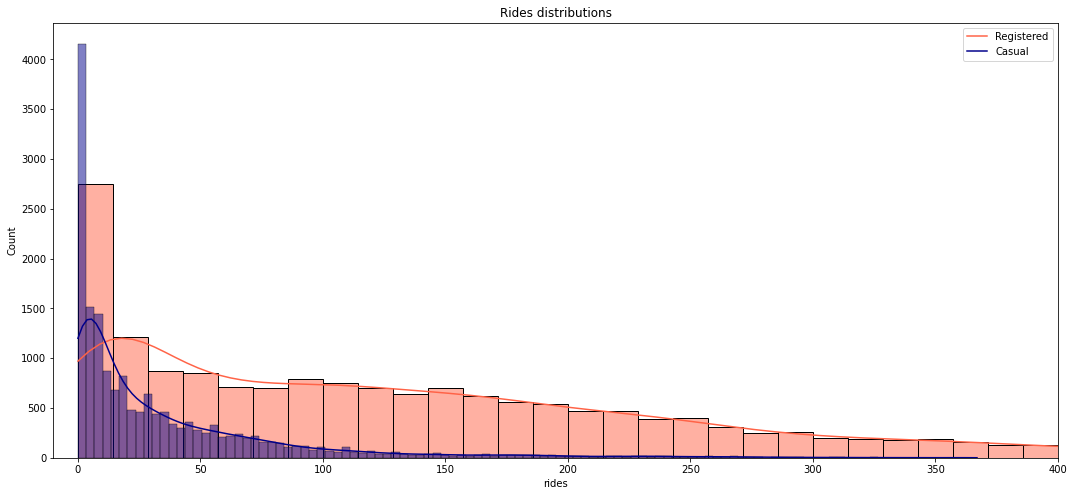

In [15]:
# plot the distributions of registered and casual columns

fig, ax = plt.subplots(1, 1, figsize=(18, 8))

sns.histplot(cleaned_data['registered'], ax=ax, legend="Registered",color="tomato", kde=True)
sns.histplot(cleaned_data['casual'], ax=ax, legend="Casual", color="darkblue", kde=True)
ax.legend(['Registered', 'Casual'])
ax.set_xlabel('rides')
ax.set_title("Rides distributions")
ax.set_xlim((-10, 400))

## Interpretation & Conclusion

1. The users registered perform way mores rides than causal ones.
2. The both distributions are skewed to the right : that mean that most of the data entries, zero or a small number of rides were registered. This could be because of overnight rides.
3. The mininum number of registered rides is 0 and the maximun numbers is 886.
4. For 75% of the entries data, there less or equal to 220 registered rides and then 25% of the data are at least than 220 registered for maximal values of 886.
5. The mean value of registed rides per day is 153.78.
6. The minimun number no registered rides is also 0 and the maximum number is 367.
7. For 75% of the entries data, only 48 rides are not registered and then 25% of the data entries are over than 48 no registered rides.
8. The mean value of not registered rides per day is 35.67.

### <span><center style="text-decoration:underline">ANALYSING SEASONAL IMPACT ON RIDES</center></span>

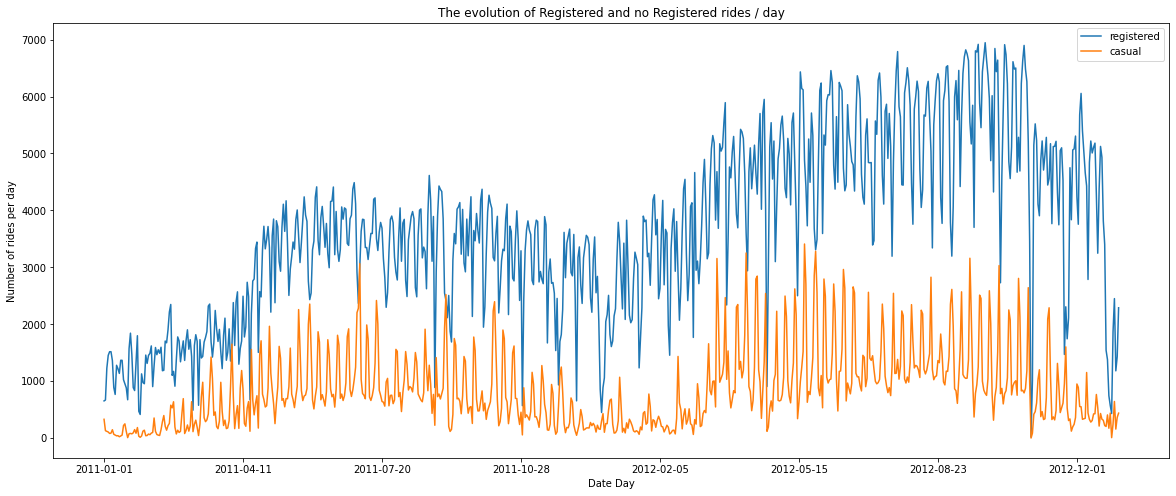

In [16]:
# Visualisation the evolution of registered and casual rides per day
dteday_group = cleaned_data[['dteday', 'registered', 'casual']].groupby('dteday').sum()
dteday_group.plot(figsize=(20, 8))
plt.title('The evolution of Registered and no Registered rides / day')
plt.xlabel('Date Day')
plt.ylabel('Number of rides per day');

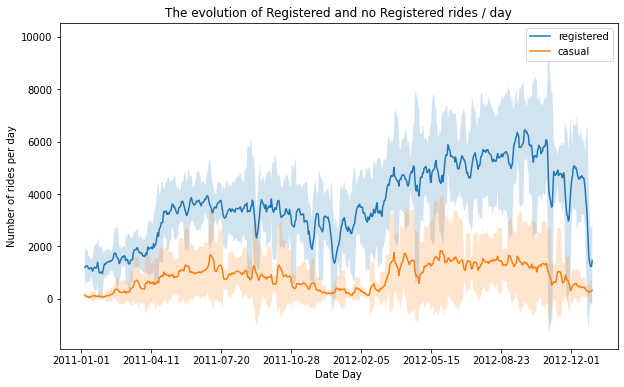

In [17]:
"""
Create new dataframe with necessary for plotting columns, and obtain
number of rides per day, by grouping over each day
"""

window = 7

rolling_means = dteday_group.rolling(window).mean()
rolling_std = dteday_group.rolling(window).std()

"""
Create a plot of the series, where we first plot the series of rolling
means, then we color the zone between the series of rolling means +- 2
rolling standard deviations
"""

ax = rolling_means.plot(figsize=(10, 6))
ax.fill_between(rolling_means.index, rolling_means['registered'] \
                + 2*rolling_std['registered'], \
                rolling_means['registered'] - 2*rolling_std['registered'],\
                alpha=0.2)

ax.fill_between(rolling_means.index,\
                rolling_means['casual']+2*rolling_std['casual'],\
               rolling_means['casual']-2*rolling_std['casual'],\
               alpha=0.2)

ax.set_title('The evolution of Registered and no Registered rides / day')
ax.set_xlabel('Date Day')
ax.set_ylabel('Number of rides per day');

#### Interpretation
1. According to both plot, the number of registered rides is always above and significantly higher than the number of casual rides per day.
2. We can observe that during winter season, the overall numbers of rides decrease. That is in line with our expectations. En fact, Bad weather and low temperatures have negative impact on ride sharing services.

3. The rolling standart deviation is almost constant during the time.
3. But the rolling standart mean change over the time. 

#### Next :
In the next step we will be exploring the distributions of requests over separate hours and days of week. We would expect that certain time patterns to arise, as bike requests should be more frequent during certain hours of the day depending on the day of the week.

In [18]:
# Select the relevant columns

cols = ['hr', 'weekday', 'casual', 'registered']

"""
transform the data into a format, in number of entries are computed as
count,
for each distinct hr, weekday and type (registered or casual)
"""

hr_melt_data = pd.melt(cleaned_data[cols], id_vars=['hr', 'weekday'], var_name='type', value_name='count')

In [19]:
hr_melt_data

,hr,weekday,type,count
0,0,Sunday,casual,3
1,1,Sunday,casual,8
2,2,Sunday,casual,5
3,3,Sunday,casual,3
4,4,Sunday,casual,0
...,...,...,...,...
34753,19,Tuesday,registered,108
34754,20,Tuesday,registered,81
34755,21,Tuesday,registered,83
34756,22,Tuesday,registered,48


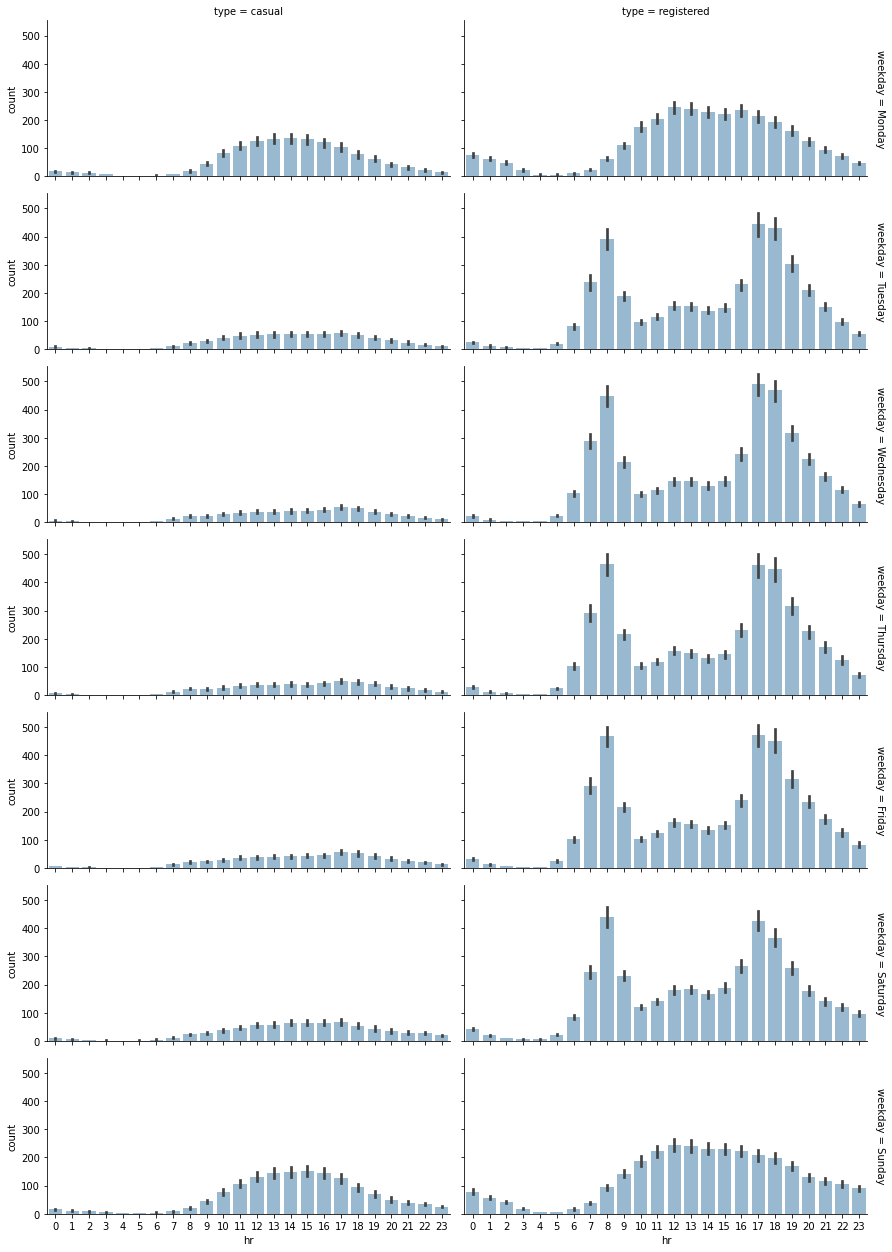

In [20]:
"""
create FacetGrid object, in which a grid plot is produced.
As columns, we have the various days of the week,
as rows, the different types (registered and casual)
"""

grid = sns.FacetGrid(hr_melt_data, row='weekday', col='type',\
                    row_order=['Monday', 'Tuesday', 'Wednesday',\
                               'Thursday','Friday', 'Saturday', 'Sunday'],\
                    height=2.5, aspect=2.5, margin_titles=True)
grid.map(sns.barplot, 'hr', 'count',order=None, alpha=0.5);

#### Interpretation
1. There are less and less registered users using the bike sharing services from 0 AM to 7 AM. That correspond to the time where most the workers are in rest.
2. On working day, the registered users rides numbers is high around from 7 AM to 9 AM and 4 PM to 8 PM. It like the most registered users use the bike sharing service for commuting.
3. From 9 AM to 4 PM, the numbers of registered users are decrease. At this time most of the workers are in their work department.
4. The casual usage of bike sharing on workings day are limited.
5. All the above analysis are in line with our expections. We can conclude that most of the usage of bike sharing service occurs during working days, right before and right after the standard working time.

In [21]:
# Select the relevan columns 
cols = ['hr', 'season', 'registered', 'casual']

# Creating a new dataset by unpivoting the dataset from wide to long

season_hr_melt_data = pd.melt(cleaned_data[cols], id_vars=['hr', 'season'],\
       var_name="type", value_name="count")
season_hr_melt_data

,hr,season,type,count
0,0,winter,registered,13
1,1,winter,registered,32
2,2,winter,registered,27
3,3,winter,registered,10
4,4,winter,registered,1
...,...,...,...,...
34753,19,winter,casual,11
34754,20,winter,casual,8
34755,21,winter,casual,7
34756,22,winter,casual,13


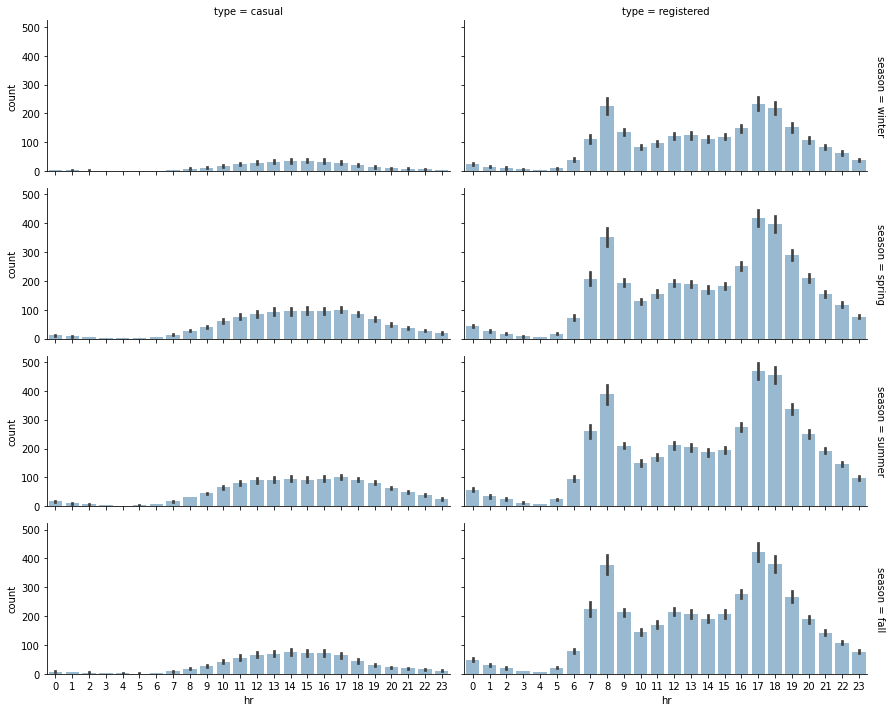

In [22]:
"""
create FacetGrid object, in which a grid plot is produced.
As columns, we have the various season,
as rows, the different types (registered and casual)
"""

grid = sns.FacetGrid(season_hr_melt_data,\
                     row='season', col='type',\
                    height=2.5, aspect=2.5,\
                     margin_titles=True,\
                     col_order=['casual', 'registered']
                    )

grid.map(sns.barplot, 'hr', 'count', order=None, alpha=0.5); 

#### Interpretation

1. All the four seasons are almost the same shape. But, the season winter are lower than the others season.
2. This is possible because there are fewer rides(both casual and registered users) during winter. Fewer rides are likely to occur when the weathers conditions are poor.

In [23]:
# Select the relevant columns

cols = ['weekday', 'season', 'registered', 'casual']

weekday_season_grp = pd.melt(cleaned_data[cols],\
                             id_vars=['weekday', 'season'],\
                            var_name='type', value_name='count')
weekday_season_grp

,weekday,season,type,count
0,Sunday,winter,registered,13
1,Sunday,winter,registered,32
2,Sunday,winter,registered,27
3,Sunday,winter,registered,10
4,Sunday,winter,registered,1
...,...,...,...,...
34753,Tuesday,winter,casual,11
34754,Tuesday,winter,casual,8
34755,Tuesday,winter,casual,7
34756,Tuesday,winter,casual,13


In [24]:
days = ['Monday', 'Tuesday', 'Wednesday',\
        'Thursday', 'Friday', 'Saturday',\
        'Sunday']
weekday_api = pd.api.types.CategoricalDtype(categories=days, ordered=False)
weekday_season_grp['weekday'] = weekday_season_grp['weekday'].astype(weekday_api)

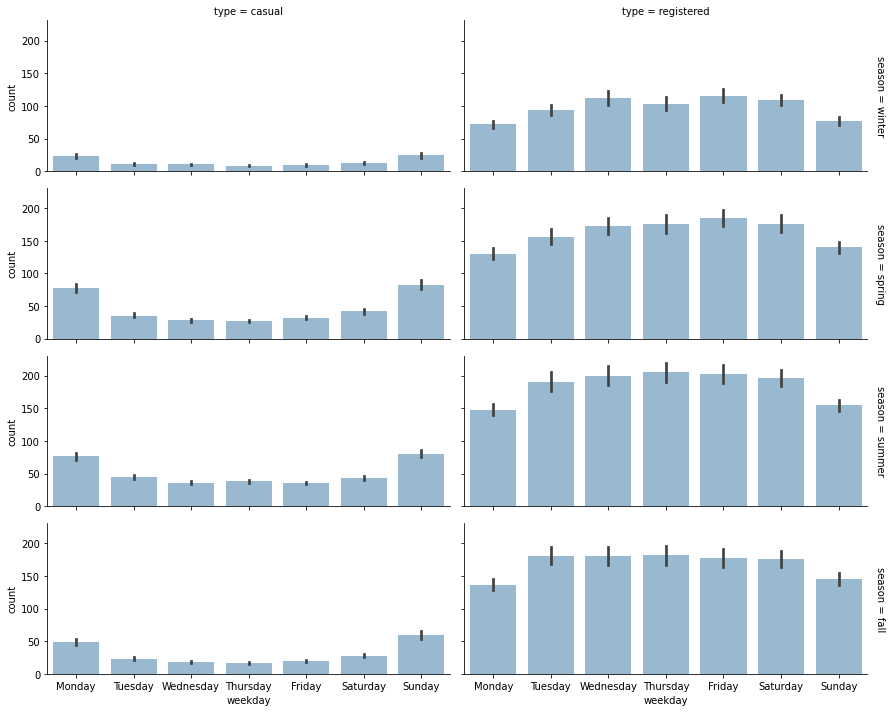

In [25]:
"""
create FacetGrid object, in which a grid plot is produced.
As columns, we have the various days of the week,
as rows, the different types (registered and casual)
"""

grid = sns.FacetGrid(weekday_season_grp, row='season',\
                     col='type',\
                    height=2.5, aspect=2.5,\
                    margin_titles=True, col_order=['casual', 'registered'])
grid.map(sns.barplot, 'weekday', 'count', order=None, alpha=0.5);

#### Interpretation

1. There is a decreasing number of registered rides over the sunday and Monday comparing to the other days of the week
2. While the number of casual rides increase onver the sunday and Monday.
3. That renforce our hypothesis, that is, the the registered rides monstly us the bike sharing services for commuting. while the casual customers use it occasionnaly over the weekend.

In [26]:
season_grp = cleaned_data[['season', 'casual', 'registered']].groupby('season').sum()
season_grp.reset_index(inplace=True)
season_grp
season_mapping = ['winter', 'spring', 'summer', 'fall']
season_api = pd.api.types.CategoricalDtype(season_mapping, ordered=False)
season_grp['season'] = season_grp['season'].astype(season_api)

# sns.barplot(season_grp, x='season')
season_grp

,season,casual,registered
0,fall,129782,711831
1,spring,203522,715067
2,summer,226091,835038
3,winter,60622,410726


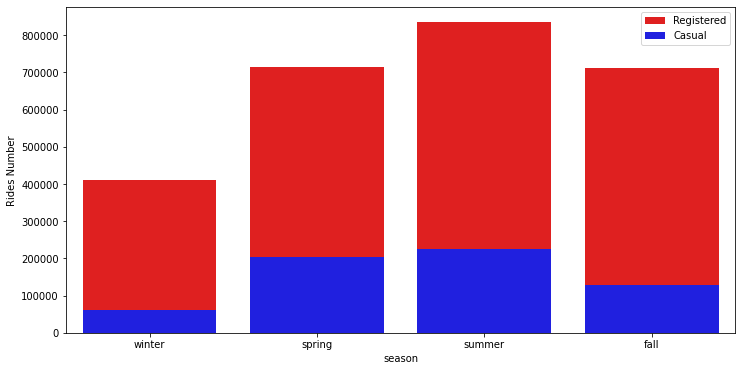

In [27]:
plt.figure(figsize=(12, 6))
fig1 = sns.barplot(data=season_grp, x='season', y='registered', color='red', label='Registered')

fig2 = sns.barplot(data=season_grp, x='season', y='casual', color='blue', label='Casual')
plt.ylabel('Rides Number')
plt.legend();

#### Interpretation
1. From the barplot above, we can see that the number of rides is very high in sping, summer and fall.
2. In other hand the number of rides is lower in winter. 
3. All these confirme our expections, the of bike sharing service change over the season.

### <span><center style="text-decoration:underline">HYPOTHESIS TESTS / INFERENTIAL ANALYSE</center></span>
The hypothesis test, provide tools to confirme or reject our passed affirmation abour registered and casual users of bike sharing services. From the previous analysis, we observed graphically that registered users tend to use bike sharing services during working days than weekend. We have to assess this statement by using hypothesis test. We will test whetter the mean of registered rides during working days is the same as during the weekend.  
* H_0 : Average registered rides over weekdays-average registered rides over weekend = 0;
* H_a : Average registered rides over weekdays-average registered rides over weekend !=0;

In [28]:
# Compute population mean of registered rides
population_mean = cleaned_data['registered'].mean()

In [29]:
# get sample of the data (summer 2011)

sample = cleaned_data[(cleaned_data['season']=='summer')\
             & (cleaned_data['yr']==2011)].registered

In [30]:
# perform t-test and compute the p-value
from scipy.stats import ttest_1samp

In [31]:
test_result = ttest_1samp(sample, population_mean)
print(f"Test Statistic : {test_result[0]}, P-value : {test_result[1]}")

Test Statistic : -3.4919691483786197, P-value : 0.0004887645279519505


In [32]:
import random
random.seed(111)

In [33]:
sample_unbiased = cleaned_data.registered.sample(frac=0.05)
test_result_unbiased = ttest_1samp(sample_unbiased, population_mean)

print(f"Test Statistic : {test_result_unbiased[0]}, P-value : {test_result_unbiased[1]}")

Test Statistic : -0.9581622937125921, P-value : 0.3382477276949015


### Exercise 1.04: Hypothesis Testing on Registered and Casual Rides
#### Hypothesis Testing on Registered Rides

In [34]:
# Perform ttest

from scipy.stats import ttest_ind

In [35]:
# Define mask, indicating if the day is weekend or work day

weekend_days = ['Saturday', 'Sunday']
weekend_mask = cleaned_data.weekday.isin(weekend_days)
~weekend_mask

# Selecte registered rides for weekend and working days

weekend_data = cleaned_data.registered[weekend_mask]
workingdays_data = cleaned_data.registered[~weekend_mask]

In [36]:
test_res = ttest_ind(weekend_data, workingdays_data)
print('Statistic value : {}, p-value : {}'.format(test_res[0], test_res[1]))

Statistic value : -3.9069208771325274, p-value : 9.383374424675882e-05


In [ ]:
plt.figure(figsize=(14, 6))
sns.histplot(weekend_data, kde=True, label='Weekend Days', color="blue")
sns.histplot(workingdays_data, kde=True, label='Working Days', color='tomato')
plt.xlabel('Registered Rides')
plt.ylabel('Frequency')
plt.title("Registered rides distributions")
plt.legend();

#### Interpretation

1. The statistical test value is : -3.9069208771325274 and the  p-value : 9.383374424675882e-05 < 5%. So we can reject the H_0 hypothesis and confirm that our initial confirmation is correct. 
2. There is a statistically difference between the numbers of rides performed during working days and the weekend.

#### Hypothesis Testing on Casual Rides
* H_0 : the average number of rides during working days is the same as the average number of rides during the weekend
* H_a : a statistically significant difference in the average number of rides between the two groups

In [ ]:
weekend_data = cleaned_data.casual[weekend_mask]
workingdays_data = cleaned_data.casual[~weekend_mask]
test_result = ttest_ind(weekend_data, workingdays_data)
print('Statistic value : {}, p-value : {}'.format(test_result[0], test_res[1]))

In [ ]:
plt.figure(figsize=(14, 6))
sns.histplot(weekend_data, kde=True, label='Weekend Days', color="blue")
sns.histplot(workingdays_data, kde=True, label='Working Days', color='tomato')
plt.xlabel('Casual Rides')
plt.ylabel('Frequency')
plt.title("Casual rides distributions")
plt.legend();

#### Interpretation

1. The statistic test give us : Statistic value : 18.44383888876469, p-value : 9.383374424675882e-05. the pvalue is very low then 5%. that means, we can reject the null hypothesis. 
2. The casual rides behave differently over weekend days as show in the figure above.

## Conclusion partial

In conclusion, we can say that there is a statistically significant difference between
the number of rides on working days and weekend days for both casual and
registered customers.

### <span><center style="text-decoration:underline">ANALYSIS OF WEATHER RELATED FEATURES</center></span>
    This section is about analysis of the group of features representing weather conditions. The weather features identified is : 
    - weathersit : categorical variable representing the current weather situation
    - temp : normalized temperature in celsius
    - atemp : the normalized feeling temperature in celcius
    - hum : the humidity level as a percentage
    - windspeed : the wind speed in m/s
Our expections in this analysis is to find any relationship between rides number and the weather. Because bad weather can signicantly influence bike sharing services.

In [ ]:
def plot_correlations(data, col):
    plt.figure(figsize=(15, 8))
    # get correlations between col and registered rides
    corr_c = np.corrcoef(x = data[col], y=data['registered'])[0, 1]
    ax = sns.regplot(x = col, y = 'registered', data=data,\
                    scatter_kws={'alpha':0.05},\
                    label=f"Registered rides (correlation: {corr_c:.3f})"
                    )
    # get correlations between col and casual rides
    corr_c = np.corrcoef(x = data[col], y=data['casual'])[0, 1]
    ax = sns.regplot(x = col, y = 'casual', data=data,\
                    scatter_kws={'alpha':0.05},\
                    label=f"Casual rides (correlation: {corr_c:.3f})"
                    )
    
    legend = ax.legend()
    for lh in legend.legendHandles:
        lh.set_alpha(0.5)
    ax.set_ylabel("Rides")
    ax.set_title(f"Correlation Between Rides And {col.capitalize()}")
    return ax

In [ ]:
# plt.figure(figsize=(15, 8))
ax = plot_correlations(cleaned_data, "temp")
ax = plot_correlations(cleaned_data, "atemp")

In [ ]:
ax = plot_correlations(cleaned_data, "hum")
ax = plot_correlations(cleaned_data, "windspeed")

In [ ]:
cleaned_data[['registered', 'casual', 'atemp', 'temp', 'windspeed', 'hum']].corr()

#### Interpretation

1. The higher temperatures have positive impact on the number of rides. The number of rides increase as well as the level of temperatures increase. But this correlation isn't very significative. For both temperatures variables, casual has a strong correlation compared to registered rides.
2. There is a negative correlation between humidity and  rides. So the increase of humidity will decrease the numbers of rides. That make sense since the customers will tend not to use bike sharing service in the case of high level of humidity.
3. We have a weak positive correlation between rides and wind speed. However, the increase of wind speed will decrease the numbers of rides.

### Evaluating the Difference between the Pearson and Spearman Correlations

In [ ]:
from scipy.stats import pearsonr, spearmanr

In [ ]:
X = np.linspace(0, 5, 100)
y_lin = 0.5*X + 0.1*np.random.randn(100)
y_mon = np.exp(X) + 0.1*np.random.randn(100)

In [ ]:
corr_lin_pearson = pearsonr(X, y_lin)[0]
corr_lin_spearman = spearmanr(X, y_lin)[0]
corr_mon_pearson = pearsonr(X, y_mon)[0]
corr_mon_spearman = spearmanr(X, y_mon)[0]

In [ ]:
# visualize variables
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
ax1.scatter(X, y_lin)
ax1.set_title(f"Linear relationship\n \
Pearson: {corr_lin_pearson:.3f}, \
Spearman: {corr_lin_spearman:.3f}")
ax2.scatter(X, y_mon)
ax2.set_title(f"Monotonic relationship\n \
Pearson: {corr_mon_pearson:.3f}, \
Spearman: {corr_mon_spearman:.3f}")

In [ ]:
# Defining a function for computing correlations

def compute_correlations(data, col):
    pearson_registered = pearsonr(data[col], data['registered'])[0]
    pearson_casual = pearsonr(data[col], data['casual'])[0]
    spearman_registered = pearsonr(data[col], data['registered'])[0]
    spearman_casual = pearsonr(data[col], data['casual'])[0]
    return pd.Series({'Pearson Registered':pearson_registered,\
              'Pearson Casual':pearson_casual,\
               'Spearman Registered':spearman_registered,\
               'Spearman Casual':spearman_casual
              })

def corr(data, columns=[]):
    X_df = pd.DataFrame()
    for col in columns:
        X = compute_correlations(data, col)
        X_df[col] = X
    return X_df.T

In [ ]:
cols = ["temp", "atemp", "hum", "windspeed", 'registered', 'casual']
corr_df = corr(cleaned_data, cols)

In [ ]:
corr_df

In [ ]:
# Plot the correlation matrix
corr_matrix = cleaned_data[cols].corr()
fig = plt.figure(figsize=(10, 8))
plt.matshow(corr_matrix, fignum=fig.number)
plt.xticks(range(len(cols)), cols)
plt.yticks(range(len(cols)), cols)
plt.colorbar()
plt.ylim([5.5, -0.5]);

In [ ]:
corr_matrix[['registered', 'casual']]

### Partial Conclusion

The section is all about analysing the correlation between the weather and rides. From the look of thing, casual customers are far keener on using bike sharing service when the temperatures is higher.  
The previous analysis show that casual customers ride mostly during the weekend and do not rely on bike sharing service for commuting work. As opposed to registered customers whose rides have a weaker correlation with temperature. 

### Time Series Analysis

In [ ]:
"""
define function for plotting rolling statistics and ADF test for time
series
"""

from statsmodels.tsa.stattools import adfuller

In [ ]:
def test_stationarity(ts, window = 10, **kwargs):
    # Create dataframe for plotings
    plot_data = pd.DataFrame(ts.copy())
    plot_data['rolling_mean'] = ts.rolling(window).mean()
    
    plot_data['rolling_std'] = ts.rolling(window).std()
    # Compute the Dicker-Fuller test
    
    p_val = adfuller(ts)[1]
    ax = plot_data.plot(**kwargs)
    ax.set_title(f"Dickey-Fuller p-value: {p_val:.3f}")
    pass

def adf_test(data):
    result=adfuller(data)
    labels = ['Test parameters', 'p-value','#Lags Used','Dataset observations']
    print("===="*10)
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("Dataset is stationary")
    else:
        print("Dataset is non-stationary ")
    print("===="*10)

In [ ]:
# Get daily registered rides

daily_registered = cleaned_data[['dteday', 'registered']]
daily_registered.set_index('dteday', inplace=True)
daily_registered_grb = daily_registered.groupby('dteday').sum()
daily_registered_grb.index = pd.to_datetime(daily_registered_grb.index)

test_stationarity(daily_registered_grb)

In [ ]:
adf_test(daily_registered_grb)

In [ ]:
# Get daily casual rides

daily_casual = cleaned_data[['dteday', 'casual']]
daily_casual.set_index('dteday', inplace=True)
daily_casual_grb = daily_casual.groupby('dteday').sum()
daily_casual_grb.index = pd.to_datetime(daily_casual_grb.index)

test_stationarity(daily_casual_grb)

In [ ]:
adf_test(daily_casual_grb)

### Interpretation
1. From the plotting data, we can see that neither the moving average nor the standard deviation are stationary;
2. The Dicker-fuller test give a pvalue of 0.355 and 372 for registered and casual respectively; that means strongly the rides data are not stationary.
3. We need to process them in order to get stationary one.

In [ ]:
# Registered rides
daily_registered_grb_ma = daily_registered_grb.rolling(10).mean()

daily_registered_ma_diff = daily_registered_grb - daily_registered_grb_ma
daily_registered_ma_diff.dropna(inplace=True)

# casual rides

daily_casual_grb_ma = daily_casual_grb.rolling(10).mean()

daily_casual_ma_diff = daily_casual_grb - daily_casual_grb_ma
daily_casual_ma_diff.dropna(inplace=True)

In [ ]:
test_stationarity(daily_registered_ma_diff)

In [ ]:
adf_test(daily_registered_ma_diff)

In [ ]:
test_stationarity(daily_casual_ma_diff)

In [ ]:
adf_test(daily_casual_ma_diff)

In [ ]:
daily_registered_grb_diff = daily_registered_grb - daily_registered_grb.shift()
daily_registered_grb_diff.dropna(inplace=True)
daily_casual_grb_diff = daily_casual_grb - daily_casual_grb.shift()
daily_casual_grb_diff.dropna(inplace=True)

In [ ]:
test_stationarity(daily_registered_grb_diff, figsize=(10, 8))

In [ ]:
adf_test(daily_registered_grb_diff)

In [ ]:
test_stationarity(daily_casual_grb_diff, figsize=(10, 8))

In [ ]:
adf_test(daily_casual_grb_diff)

### Time Series Decomposition
This involves breaking the original time series into differentes components:
* Trend component : this component represent a long-term progression of the series. A trend component occurs when there is a persistent increase or decrease or the series.
* Seasonal component: this component represent a seasonality patterns present in the data. A seasonal component persists when the data is influenced by seasonal factors(monthly, quarterly, yearly)
* Residual component: this component represent an irregular or noisy component. This component describes a random fluctuations in the data.

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [ ]:
registered_decomposition = seasonal_decompose(daily_registered_grb)
casual_decomposition = seasonal_decompose(daily_casual_grb)

In [ ]:
registered_plot = registered_decomposition.plot()
registered_plot.set_size_inches(10, 8)

In [ ]:
casual_plot = casual_decomposition.plot()
casual_plot.set_size_inches(10, 8)

In [ ]:
registered_residu = registered_decomposition.resid.dropna()
test_stationarity(registered_residu, figsize=(10, 8))

In [ ]:
casual_residu = casual_decomposition.resid.dropna()
test_stationarity(casual_residu, figsize=(10, 8))

#### Interpretation

1. From the past time series analysis, the rides data was non-stationary according to visualisation and Dickey-Fuller Test.
2. Doing some process like rolling average method allow us to get stationary data.
3. Above all, an interresting patterns occurs in the casual rides: a rolling standard deviation exhibits a clustering effect. A periode which the standart deviation is higher and a period wich it is lower. The number of casual rides increases during summer periods and decreases during winter.

### ARIMA Models

In [ ]:
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf

In [ ]:
fig, axes = plt.subplots(3, 3, figsize=(25, 12))

# Plot the original series
axes[0, 0].plot(daily_registered_grb)
axes[0, 0].set_title('Originales Registered Series')
plot_acf(daily_registered_grb, ax=axes[0, 1])
plot_pacf(daily_registered_grb, ax=axes[0, 2], method='ywm')

# Plot the first order integrated series
first_order_int = daily_registered_grb.diff().dropna()
axes[1, 0].plot(first_order_int)
axes[1, 0].set_title('First Order Integrated')
plot_acf(first_order_int, ax=axes[1, 1])
plot_pacf(first_order_int, ax=axes[1, 2], method='ywm')

# Plot the second order integrated series
# Plot the first order integrated series
second_order_int = first_order_int.diff().dropna()
axes[2, 0].plot(second_order_int)
axes[2, 0].set_title('Second Order Integrated')
plot_acf(second_order_int, ax=axes[2, 1])
plot_pacf(second_order_int, ax=axes[2, 2], method='ywm');

In [ ]:
fig, axes = plt.subplots(3, 3, figsize=(25, 12))

# Plot the original series
axes[0, 0].plot(daily_casual_grb)
axes[0, 0].set_title('Originales Registered Series')
plot_acf(daily_casual_grb, ax=axes[0, 1])
plot_pacf(daily_casual_grb, ax=axes[0, 2], method='ywm')

# Plot the first order integrated series
first_order_int = daily_casual_grb.diff().dropna()
axes[1, 0].plot(first_order_int)
axes[1, 0].set_title('First Order Integrated')
plot_acf(first_order_int, ax=axes[1, 1])
plot_pacf(first_order_int, ax=axes[1, 2], method='ywm')

# # Plot the second order integrated series
# Plot the first order integrated series
second_order_int = first_order_int.diff().dropna()
axes[2, 0].plot(second_order_int)
axes[2, 0].set_title('Second Order Integrated')
plot_acf(second_order_int, ax=axes[2, 1])
plot_pacf(second_order_int, ax=axes[2, 2], method='ywm');

In [ ]:
from pmdarima import auto_arima

In [ ]:
model_registered = auto_arima(daily_registered_grb,\
                   start_p=1, start_q=1,\
                   max_p=3, map_q=3,\
                   information_criterion="aic")
print(model_registered.summary())

In [ ]:
model_casual = auto_arima(daily_casual_grb,\
                   start_p=1, start_q=1,\
                   max_p=3, map_q=3,\
                   information_criterion="aic")
print(model_casual.summary())

In [ ]:
plot_data = pd.DataFrame(daily_registered_grb)
plot_data['predicted'] = model_registered.predict_in_sample()
plot_data.plot(figsize=(20, 8))
plt.ylabel("number of registered rides")
plt.title("Predicted vs actual number of rides");

In [ ]:
from sklearn.metrics import mean_absolute_error

In [ ]:
np.sqrt(mean_absolute_error(plot_data['registered'], plot_data['predicted']))

In [ ]:
plot_data = pd.DataFrame(daily_casual_grb)
plot_data['predicted'] = model_casual.predict_in_sample()
plot_data.plot(figsize=(20, 8))
plt.ylabel("number of Casual rides")
plt.title("Predicted vs actual number of rides");

In [ ]:
np.sqrt(mean_absolute_error(plot_data['casual'], plot_data['predicted']))

### Activity 1.01: Investigating the Impact of Weather Conditions on Rides

In [ ]:
cleaned_data.weathersit.unique()

In [ ]:
def plot_wheathersit_correlations(data, col, weathersit, ax=None):
    _data = data[data['weathersit']==weathersit]
    
    # get correlations between col and registered rides
    corr_c = np.corrcoef(x = _data[col], y=_data['registered'])[0, 1]
    sns.regplot(x = col, y = 'registered', data=_data,\
                    scatter_kws={'alpha':0.05},\
                    label=f"Registered rides (correlation: {corr_c:.3f})",\
                     ax=ax
                    )
    # get correlations between col and casual rides
    corr_c = np.corrcoef(x = _data[col], y=_data['casual'])[0, 1]
    sns.regplot(x = col, y = 'casual', data=_data,\
                    scatter_kws={'alpha':0.05},\
                    label=f"Casual rides (correlation: {corr_c:.3f})",\
                    ax = ax
                    )
    
    legend = ax.legend()
    for lh in legend.legendHandles:
        lh.set_alpha(0.5)
    ax.set_ylabel("Rides")
    ax.set_title(f"\n Correlation Between Rides And {col.capitalize()}\n with weathersit {weathersit}")
#     return ax

In [ ]:
cols = ["temp","atemp","hum", "windspeed"]
weather_sit = list(cleaned_data['weathersit'].unique())

In [ ]:
fig, axes = plt.subplots(4, 4, figsize=(20, 28))

for k in range(len(weather_sit)):
    for i in range(len(cols)):
        plot_wheathersit_correlations(data=cleaned_data,\
                                  weathersit=weather_sit[k],\
                                  col=cols[i], ax=axes[i, k])

In [ ]:
def print_personr_corr(data, col, weathersit):
    _data = data[data["weathersit"]==weathersit]
    pearson_registered = pearsonr(_data[col], _data['registered'])
    pearson_casual = pearsonr(_data[col], _data['casual'])
    print('\n','--'*10, weathersit, '--'*10)
    print('Pearson correlation (registered, {}): corr={:.3f}, pval={:.3f}'\
          .format(col, pearson_registered[0], pearson_registered[1]))
    print('Pearson correlation (casual, {}):corr={:.3f}, pval={:.3f}'\
          .format(col, pearson_casual[0], pearson_casual[1]))
    return None
    

In [ ]:
for col in cols:
    for ws in weather_sit:
        print_personr_corr(cleaned_data, col, ws)

In [ ]:
heavy_rain_snow  = cleaned_data[cleaned_data['weathersit']=='heavy_rain_snow']
heavy_rain_snow

In [ ]:
spearmanr(heavy_rain_snow['temp'], heavy_rain_snow['registered'])

#### Interpretation
1. The corrélation between weather condition and rides features are not very significant.
2. when the weathersit condition is clear, the correlation between the rides and temp, atemp, windspeed are positive, that means the increases of one of them impact the increase of the rides features both casual and regisered. But the correlation between both rides features and hum are negative;
3. We can observe the same patterns for the others weathersit condition. But the weathersit heavy_rain_snow has a different patterns. there are not link between it and the rides features. This may be because of the number of the record;
4. So let say that weathersit has an influence on rides features.